In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
blood_df=pd.read_csv('bloodtransf.csv')

In [ ]:
diabetes_df=pd.read_csv('diabetes_numeric.csv')

In [ ]:
wine_df=pd.read_csv('wine.csv')

In [ ]:
blood_df.head()

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1


In [ ]:
diabetes_df.head()

,age,deficit,c_peptide
0,5.2,-8.1,4.8
1,8.8,-16.1,4.1
2,10.5,-0.9,5.2
3,10.6,-7.8,5.5
4,10.4,-29.0,5.0


In [ ]:
wine_df.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Sobre o número de atributos da base de regressão, marque a alternativa CORRETA:

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43 non-null     float64
 1   deficit    43 non-null     float64
 2   c_peptide  43 non-null     float64
dtypes: float64(3)
memory usage: 1.1 KB


# Sobre o número de instâncias da base de classificação, marque a alternativa CORRETA:

In [ ]:
blood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      748 non-null    int64
 1   V2      748 non-null    int64
 2   V3      748 non-null    int64
 3   V4      748 non-null    int64
 4   Class   748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


# Sobre a base de clusterização, marque a alternativa CORRETA:

In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   class                           178 non-null    int64  
 1   Alcohol                         178 non-null    float64
 2   Malic_acid                      178 non-null    float64
 3   Ash                             178 non-null    float64
 4   Alcalinity_of_ash               178 non-null    float64
 5   Magnesium                       178 non-null    int64  
 6   Total_phenols                   178 non-null    float64
 7   Flavanoids                      178 non-null    float64
 8   Nonflavanoid_phenols            178 non-null    float64
 9   Proanthocyanins                 178 non-null    float64
 10  Color_intensity                 178 non-null    float64
 11  Hue                             178 non-null    float64
 12  OD280%2FOD315_of_diluted_wines  178 

In [ ]:
wine_df['class'].nunique()

3

# Em relação a modelagem utilizando a regressão linear, marque a alternativa CORRETA sobre a métrica r2:


In [ ]:
features_linreg = diabetes_df.iloc[:, :-1].values  #dados de entrada
labels_values_linreg = diabetes_df.iloc[:,2].values  # saídas ou target
x_train, x_test, y_train, y_test = train_test_split(features_linreg, labels_values_linreg, test_size=0.40, random_state=562)# divide 40% para teste
regression = LinearRegression().fit(x_train, y_train)
predictions_values = regression.predict(x_test)
print('R2:', metrics.r2_score(y_test, predictions_values))

R2: 0.29316806464899836


# Em relação a modelagem utilizando a regressão linear, marque a alternativa CORRETA sobre a métrica MAE:

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_values))

MAE: 0.48052237411988585


# Em relação a modelagem utilizando a regressão linear, marque a alternativa CORRETA sobre a métrica MSE: 

In [ ]:
print('MSE:', metrics.mean_squared_error(y_test, predictions_values))  

MSE: 0.3706068184488523


# Em relação a modelagem utilizando o SVM, marque a alternativa CORRETA sobre a métrica acurácia: 

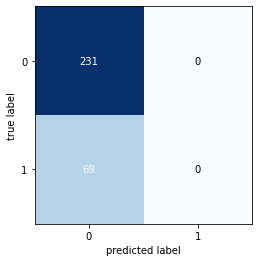

0.77

In [ ]:
#cria o objeto SVM
clf_svm = SVC(kernel='rbf')
features_svc = blood_df.iloc[:, :-1].values  #dados de entrada
labels_values_svc = blood_df.iloc[:,4].values  # saídas ou target
x_train, x_test, y_train, y_test = train_test_split(features_svc, labels_values_svc, test_size=0.40, random_state=562)# divide 40% para teste
clf_svm.fit(x_train,y_train)   
#Avaliando o modelo 
y_pred = clf_svm.predict(x_test)
#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()
accuracy_score(y_test, y_pred)

# Em relação a modelagem utilizando o SVM, marque a alternativa CORRETA sobre as métricas precision e recall: 

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      1.00      0.87       231
           2       0.00      0.00      0.00        69

    accuracy                           0.77       300
   macro avg       0.39      0.50      0.44       300
weighted avg       0.59      0.77      0.67       300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#  Em relação a modelagem utilizando o SVM, marque a alternativa CORRETA sobre a métrica f1

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      1.00      0.87       231
           2       0.00      0.00      0.00        69

    accuracy                           0.77       300
   macro avg       0.39      0.50      0.44       300
weighted avg       0.59      0.77      0.67       300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
